## Birds Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

**Exploring Images**

In [2]:
path = '100-bird-species/test/AMERICAN COOT/5.jpg'

**Original Image**

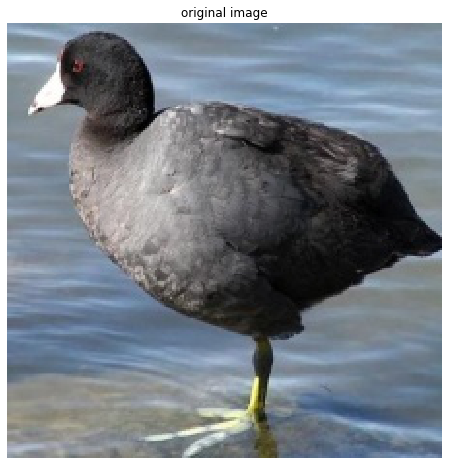

In [3]:
plt.figure(1,figsize=(12,8))
img = mpimg.imread(path)
plt.imshow(img)
plt.title('original image');
plt.axis('off');

Original size:

In [4]:
img.shape

(224, 224, 3)

**Gray Scale**

In [5]:
im = Image.open(path)
image_gr = im.convert("L")
arr = np.asarray(image_gr) 

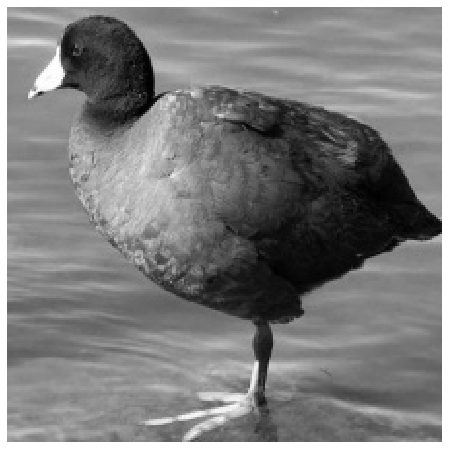

In [6]:
plt.figure(1,figsize=(12,8))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
plt.axis('off');

In [7]:
arr.shape

(224, 224)

In [8]:
arr.flatten()

array([152, 151, 151, ..., 132, 121, 116], dtype=uint8)

In [9]:
image_size = arr.size

In [10]:
image_size

50176

In [11]:
train_path = '100-bird-species/train/'

In [12]:
images_train = []
labels_train = []
for num_species, specie in enumerate(os.listdir(train_path)):
    images_path = os.path.join(train_path,specie)
    for i in os.listdir(images_path):
        image_path = os.path.join(images_path,i)
        im = Image.open(image_path)
        image_gr = im.convert("L")
        arr = np.asarray(image_gr)
        images_train.append(arr.flatten())
        labels_train.append(specie)
    if num_species == 100:
        break

In [13]:
images_train = np.array(images_train)

In [14]:
X_train = pd.DataFrame(images_train)

In [15]:
y_train = pd.Series(labels_train)

In [16]:
X_train, y_train = shuffle(X_train, y_train)

In [17]:
X_train.reset_index(drop=True)
y_train.reset_index(drop=True)

0               PARADISE TANAGER
1         BLACK-THROATED SPARROW
2                         PUFFIN
3                      WOOD DUCK
4        STORK BILLED KINGFISHER
                  ...           
14176           D-ARNAUDS BARBET
14177           BALTIMORE ORIOLE
14178                       CROW
14179          AFRICAN FIREFINCH
14180                   SHOEBILL
Length: 14181, dtype: object

In [18]:
validation_path = '100-bird-species/valid/'

In [19]:
images_val = []
labels_val = []
for num_species, specie in enumerate(os.listdir(validation_path)):
    images_path = os.path.join(validation_path,specie)
    for i in os.listdir(images_path):
        image_path = os.path.join(images_path,i)
        im = Image.open(image_path)
        image_gr = im.convert("L")
        arr = np.asarray(image_gr)
        images_val.append(arr.flatten())
        labels_val.append(specie)
    if num_species == 100:
        break

In [20]:
images_val = np.array(images_val)
X_val = pd.DataFrame(images_val)
y_val = pd.Series(labels_val)
X_val, y_val = shuffle(X_val, y_val)
X_val.reset_index(drop=True)
y_val.reset_index(drop=True)

0      WILSONS BIRD OF PARADISE
1       STORK BILLED KINGFISHER
2                HYACINTH MACAW
3                     SNOWY OWL
4                      SHOEBILL
                 ...           
500             COMMON STARLING
501                CAPUCHINBIRD
502             GILA WOODPECKER
503           CALIFORNIA CONDOR
504                GOLDEN EAGLE
Length: 505, dtype: object

In [21]:
pd.set_option('max_rows', None)

In [22]:
y_train.value_counts(normalize=True).sort_values(ascending=False)

SORA                        0.021155
D-ARNAUDS BARBET            0.016430
WOOD DUCK                   0.015091
CASPIAN TERN                0.015020
VIOLET GREEN SWALLOW        0.014174
NORTHERN PARULA             0.013821
SPOONBILL                   0.013539
AMERICAN PIPIT              0.012623
FLAME TANAGER               0.012481
PARADISE TANAGER            0.012411
GOLDEN CHEEKED WARBLER      0.012411
SHOEBILL                    0.012340
GLOSSY IBIS                 0.012340
BLACK-THROATED SPARROW      0.011847
STRAWBERRY FINCH            0.011776
RED FACED WARBLER           0.011776
COCKATOO                    0.011706
ALEXANDRINE PARAKEET        0.011635
TOWNSENDS WARBLER           0.011635
PAINTED BUNTIG              0.011494
MALACHITE KINGFISHER        0.011494
SNOWY OWL                   0.011353
BALD EAGLE                  0.011283
BEARDED BARBET              0.011283
AMERICAN COOT               0.011142
NORTHERN JACANA             0.011001
TURQUOISE MOTMOT            0.011001
G

Before balancing:

In [23]:
rfc = RandomForestClassifier(min_samples_split=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
pred_val = rfc.predict(X_val)

In [25]:
print(classification_report(y_val, pred_val))

                          precision    recall  f1-score   support

       AFRICAN FIREFINCH       0.17      0.40      0.24         5
               ALBATROSS       1.00      0.20      0.33         5
    ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
           AMERICAN COOT       0.29      0.40      0.33         5
          AMERICAN PIPIT       0.05      0.20      0.08         5
       ANNAS HUMMINGBIRD       0.22      0.40      0.29         5
              BALD EAGLE       0.20      0.40      0.27         5
        BALTIMORE ORIOLE       0.00      0.00      0.00         5
            BARN SWALLOW       0.00      0.00      0.00         5
          BEARDED BARBET       0.33      0.40      0.36         5
       BELTED KINGFISHER       0.40      0.40      0.40         5
        BIRD OF PARADISE       0.00      0.00      0.00         5
  BLACK-CAPPED CHICKADEE       0.60      0.60      0.60         5
      BLACK-NECKED GREBE       1.00      0.40      0.57         5
  BLACK-T

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
rfc_2 = RandomForestClassifier(min_samples_split=2,max_depth=10)
rfc_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
pred_val_2 = rfc_2.predict(X_val)
print(classification_report(y_val, pred_val_2))

                          precision    recall  f1-score   support

       AFRICAN FIREFINCH       0.00      0.00      0.00         5
               ALBATROSS       1.00      0.20      0.33         5
    ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
           AMERICAN COOT       0.40      0.40      0.40         5
          AMERICAN PIPIT       0.00      0.00      0.00         5
       ANNAS HUMMINGBIRD       0.00      0.00      0.00         5
              BALD EAGLE       0.17      0.20      0.18         5
        BALTIMORE ORIOLE       0.00      0.00      0.00         5
            BARN SWALLOW       0.00      0.00      0.00         5
          BEARDED BARBET       0.07      0.20      0.11         5
       BELTED KINGFISHER       1.00      0.40      0.57         5
        BIRD OF PARADISE       0.00      0.00      0.00         5
  BLACK-CAPPED CHICKADEE       0.75      0.60      0.67         5
      BLACK-NECKED GREBE       0.00      0.00      0.00         5
  BLACK-T

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Class weight to balance classes:

In [29]:
rfc_3 = RandomForestClassifier(min_samples_split=2,criterion='entropy', class_weight='balanced',max_depth=12)
rfc_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
pred_val_3 = rfc_3.predict(X_val)
print(classification_report(y_val, pred_val_3))

                          precision    recall  f1-score   support

       AFRICAN FIREFINCH       0.00      0.00      0.00         5
               ALBATROSS       0.33      0.20      0.25         5
    ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
           AMERICAN COOT       0.25      0.40      0.31         5
          AMERICAN PIPIT       0.00      0.00      0.00         5
       ANNAS HUMMINGBIRD       0.50      0.20      0.29         5
              BALD EAGLE       0.00      0.00      0.00         5
        BALTIMORE ORIOLE       0.00      0.00      0.00         5
            BARN SWALLOW       0.00      0.00      0.00         5
          BEARDED BARBET       0.38      0.60      0.46         5
       BELTED KINGFISHER       0.29      0.40      0.33         5
        BIRD OF PARADISE       0.00      0.00      0.00         5
  BLACK-CAPPED CHICKADEE       0.17      0.20      0.18         5
      BLACK-NECKED GREBE       0.14      0.20      0.17         5
  BLACK-T

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
